# Task 1: Explortory Data Analysis

Alex Rivera ID#011243153

Western Governors University

D207 - Exploratory Data Analysis

July 3, 2023

## A1: Question For Analysis

The research question for this project is, "Is the proportion of customer churn dependent on the tech support service add-on."
Defining the null and alternative hypothesis below, followed the guidance of the JMP website(The chi-square test, 2023). 

- H0 = customer churn is independent of tech support service add-on customers. 
- H1 = customer churn is dependent on tech support service add-on customers.

An α=0.05 will be used for 95% certainty. 

## A2: Benefit From Analysis

Understanding the variables that affect customer churn is beneficial to all stakeholders due to the impact of losing a customer or customer base. Not only is it a reduction in revenue but an analysis of what causes churn can lead to higher retention and customer satisfaction. If the company can retain the customer it protects current revenue and maximizes profitability. Customer retention can be a competitive advantage by offering customers add-ons other competitors are not offering. All these will impact the long-term growth of an organization. Exploration into customer churn and tech support will be a good start to future analysis into churn.

## A3: Data Identification

Below are categorial variables relevant to answering the research question:

- Churn (qualitative), row 1 example: No

This binary variable identifies if the customer discontinued service in the past month.

- TechSupport (qualitative), row 1 example: No

This binary variable identifies if the customer has technical support.

## B1: Code

The chi-square technique was implemented for the analysis of the research question. Webinar 5 of the course material gave a detailed overview of the process followed in the coding below (Sewell, 2023).

In [1]:
#Importing necessary packages for the data cleaning project 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sea
from scipy.stats import chi2_contingency

#Loading the clean churn dataset flat file into a pandas dataframe 
churn = pd.read_csv('C:/Users/alexa/WGU/D207/Project/churn_clean.csv', index_col=0)

In [2]:
#Creating table needed for chi-square
observed = pd.crosstab(churn.Churn, churn.TechSupport)

observed

TechSupport,No,Yes
Churn,,
No,4634,2716
Yes,1616,1034


In [3]:
#Application of chi-square test, refernce used to understand function(Scipy.stats.chi2_contingency#, 2023)
chi2, p, dof, expected = chi2_contingency(observed)

alpha = 0.05

print("P value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

expected

P value is 0.06282377493466387
Independent (H0 holds true)


array([[4593.75, 2756.25],
       [1656.25,  993.75]])

## B2: Output

The chi-square test utilizing the method in webinar 5 gave the following outputs. An observed table of the churn and tech support variables needed for the analysis.

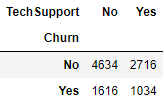

The chi2_contingency function provided the expected outcomes of the chi-square test for the variables to be independent to compare. 

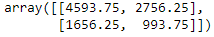

Finally, it provided the p-value to compare to the alpha defined at the beginning of the research. This allowed for 95% certainty in accepting or rejecting the hypothesis. The results will be discussed in section E1. 

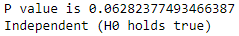

## B3: Justification

The research question was composed of two categorical variables and their dependencies. The chi-square test fits the analysis needs of the three choices requested. The chi-square test outlined in webinar 5 was a test of the independence of variables. Applying the coding example allowed us to prove the hypothesis of whether the variables were statistically significant against a defined p-value of 0.05. Chi2_contingency function allowed to review of the expected outcomes of the chi-square for the variables to be dependent and calculate the p-value for the analysis.  

## C: Univariate Statistics

Below are the two two continuous variables and two categorical variables used for the univariate statistics. Vitalflux examples were used as distribution referneces (KumarI, 2023). 

- Techie(categorical) Bernoulli distribution.

- Gender(categorical) normal distribution.

- MonthlyCharge(continuous) normal distribution.

- Income(continuous) positivelty skewed distribution.


## C1: Visual Of Findings

Below are univariate statistics visual findings, and tutorials were references for plot coding(Matplotlib tutorial, 2023).

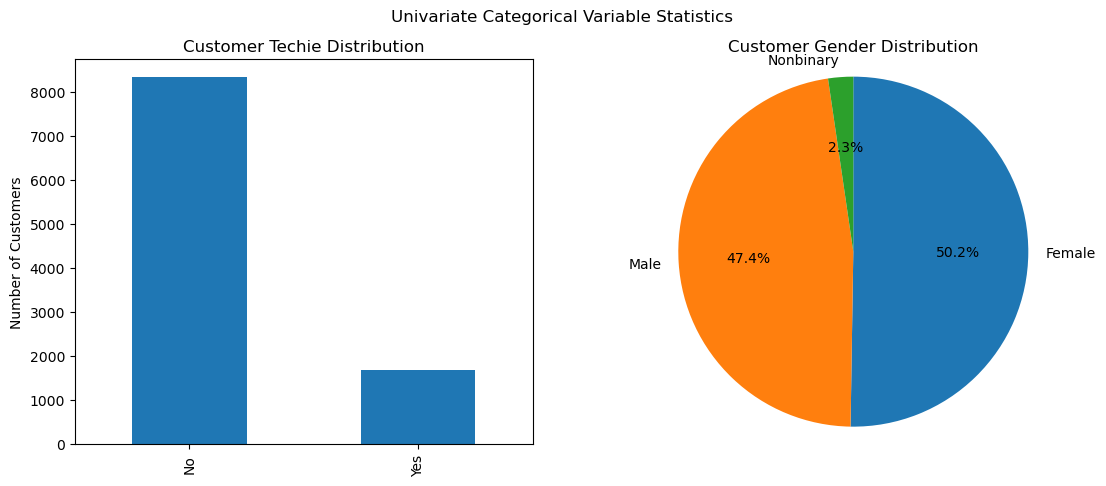

In [4]:
#Adjustment for size and title
plt.figure(figsize = [13,5])
plt.suptitle("Univariate Categorical Variable Statistics")

# Left - Univariate statistics of categorical Techie
plt.subplot(1, 2, 1)
plt.title("Customer Techie Distribution")
churn['Techie'].value_counts().plot(kind='bar')
plt.ylabel("Number of Customers");

# Right - Univariate statistics of categorical Gender variable
plt.subplot(1, 2, 2)
plt.title("Customer Gender Distribution")
gender_counts = churn["Gender"].value_counts()
gender_labels = ["Female", "Male", "Nonbinary"]
plt.pie(gender_counts, labels=gender_labels, autopct='%1.1f%%', startangle=90, counterclock = False)
plt.axis('square');

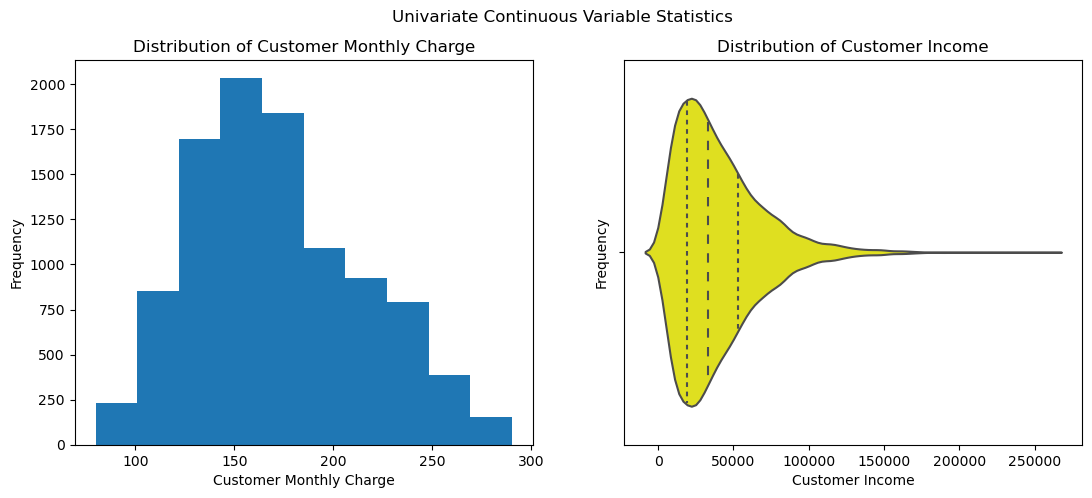

In [5]:
#Adjustment for size and title
plt.figure(figsize = [13,5])
plt.suptitle("Univariate Continuous Variable Statistics")

# Left - Univariate statistics of continuous MonthlyCharge variable
plt.subplot(1, 2, 1)
plt.title('Distribution of Customer Monthly Charge')
plt.hist(data=churn, x="MonthlyCharge", bins = 10)
plt.xlabel('Customer Monthly Charge')
plt.ylabel("Frequency");

# Right - Univariate statistics of continuous Income variable
plt.subplot(1, 2, 2)
plt.title("Distribution of Customer Income")
sea.violinplot(data=churn, x="Income", color="yellow", inner="quartile")
plt.xlabel("Customer Income")
plt.ylabel("Frequency");

## D: Bivariate Statistics


Below are the two continuous variables and two categorical variables used for the bivariate statistics. Vitalflux examples were used as distribution referneces (KumarI, 2023). 

- Marital (categorical) & Tenure (continuous) are both normal distributions. 

- Area (categorical) & Bandwidth_GB_Year (continuous) are both normal distributions.


## D1: Visual Of Findings

Below are bivariate statistics visual findings, and tutorials were references for plot coding(Matplotlib tutorial, 2023).

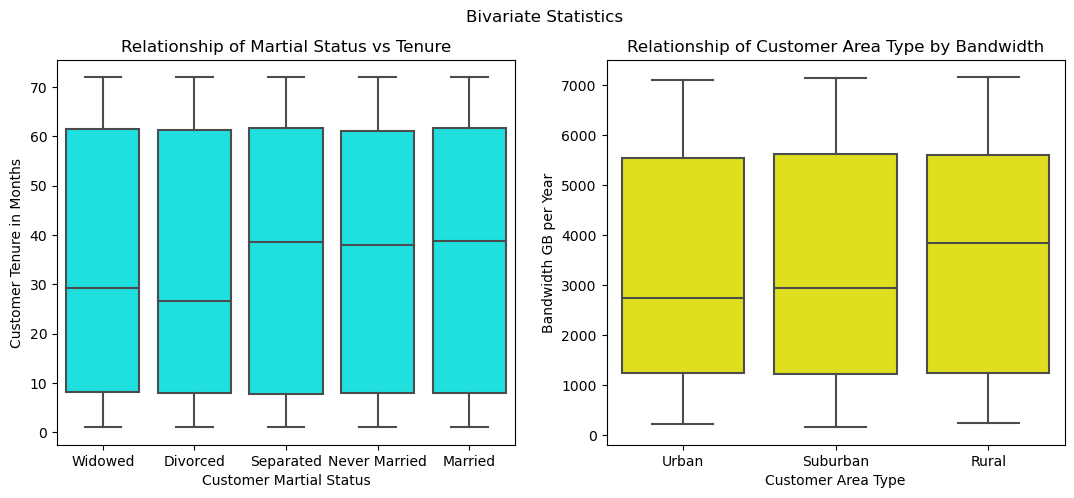

In [6]:
#Adjustment for size and title
plt.figure(figsize = [13,5])
plt.suptitle("Bivariate Statistics")

# Left - Bivariate statistics of Marital (categorical) & Tenure (continuous)
plt.subplot(1, 2, 1)
plt.title('Relationship of Martial Status vs Tenure')
plot_order = ["Widowed", "Divorced", "Separated", "Never Married","Married"]
sea.boxplot(data= churn, x= "Marital", y= "Tenure", color= "cyan", order=plot_order)
plt.xlabel('Customer Martial Status')
plt.ylabel("Customer Tenure in Months");

# Right - Bivariate statistics of Area (categorical) & Bandwidth_GB_Year (continuous)
plt.subplot(1, 2, 2)
plt.title("Relationship of Customer Area Type by Bandwidth")
sea.boxplot(data=churn, x= "Area", y = "Bandwidth_GB_Year", color= "yellow")
plt.xlabel("Customer Area Type")
plt.ylabel("Bandwidth GB per Year");

## E1: Results Of Analysis

The results of the chi-square test of churn and tech support variables with an α=0.05 yielded a P value of ~0.06282. This meant that 95% certainty the variables are Independent because the P value is greater than the alpha. H0 holds and we accept the null hypothesis below(Martin, 2019):

- **H0 = customer churn is independent of tech support service add-on customers.**
- H1 = customer churn is dependent on tech support service add-on customers.

## E2: Limitations Of Analysis

- I would need to further research if a 10,000 customer sample size is adequate or too large for the chi-square test.
- The chi-square test establishes a relationship or independence between two variables, another analysis or test would be needed if another variable is added to the research question.
- Only categorical variables can be used with the chi-square test. 

## E3: Recommended Course Of Action

Since the chi-square test showed there was no relationship between the variables no further action is needed in regards to the research question. My recommendation would be to run further chi-square tests on different categorial variables to find relationships with churn. The application of ANOVA and t-test analysis would also be worth implementing to explore relationships within the dataset. 

## F: Video

https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=158ba5c0-d7be-4e65-9ba3-b0350076aedc

## G: Sources For Third-Party Code

GeeksforGeeks. (2023, June 22). Matplotlib tutorial. GeeksforGeeks. https://www.geeksforgeeks.org/matplotlib-tutorial/#

Scipy.stats.chi2_contingency#. scipy.stats.chi2_contingency - SciPy v1.11.1 Manual. (n.d.). https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html 

Sewell, W. (2023, July). D207 Exploratory Data Analysis Webinar - Episode 5. WGU. Retrieved July 1, 2023, from https://westerngovernorsuniversity-my.sharepoint.com/:p:/g/personal/william_sewell_wgu_edu/EbIWOqJp0oJFrByVqCO5wfgB7LHdWLxGgzYyHXd2nuIV2Q?e=PrgdzD. 

## H: Sources

KumarI, A. (2023, January 14). Types of probability distributions: Codes, examples. vitalflux. https://vitalflux.com/types-probability-distributions-defined-examples/ 

Statistics made easy ! ! ! Learn about the t-test, the chi square test, the p value and more. (2019). YouTube. Retrieved July 1, 2023, from https://youtu.be/I10q6fjPxJ0. 